# Tensorflow Regression Model

Dit zijn de imports die nodig zijn voor het cleanen van de data met tensorflow keras

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data inlezen

Hieronder begin ik met het lezen van de csv dataset wat de gegevens van medicijnen geeft met de prijs, datum, categorie etc.

In [ ]:
import pandas as pd
dataset = pd.read_csv('Supplement_Sales_Dataset.csv')
dataset

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


In [ ]:
# controleert of er ergens lege waardes zijn in de dataset
dataset.isnull().values.any()

np.False_

# trainen data

in dit gedeelte wordt de data getraind door kolommen te scalen met transformer tussen de waardes 0 en 1

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Units Sold",
        "Revenue",
        "Discount",
        "Units Returned"
    ])
)
# de data voor het testen en trainen
X = dataset.drop(["Category"], axis = 1)
y = dataset["Price"]

X_train, X_test, y_train, y_test = train_test_split(X,y)
ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
X_train_normalized

array([[0.71590909, 0.12251513, 0.76      , 0.25      ],
       [0.72727273, 0.40510875, 0.44      , 0.        ],
       [0.63636364, 0.20222624, 0.6       , 0.25      ],
       ...,
       [0.39772727, 0.26668073, 0.44      , 0.        ],
       [0.46590909, 0.03529914, 0.36      , 0.375     ],
       [0.39772727, 0.24411233, 1.        , 0.        ]])

# Model maken

de models worden gemaakt net als een neuraal netwerk, met de neuronen en 1 waarde, voor de regressie omdat de output 1 continue waarde voorspelt

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9304 - mae: 0.9304  
[0.9066705107688904, 0.9066705107688904]


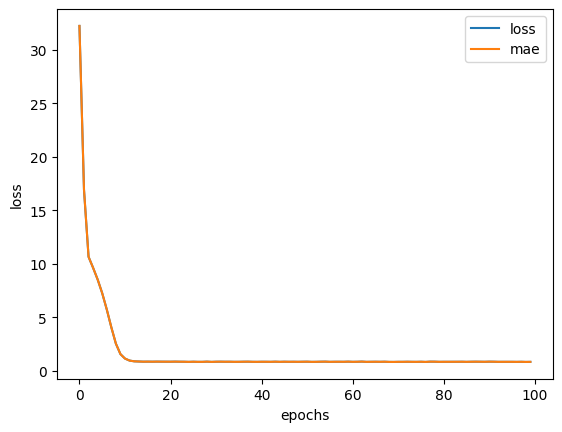

In [ ]:
model_dataset_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # bevat 10 neurons
    tf.keras.layers.Dense(1) # 1 continue waarde
])
model_dataset_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]) # loss in MAE berekend
geschiedenis = model_dataset_1.fit(X_train_normalized, y_train, epochs=100, verbose=0)
pd.DataFrame(geschiedenis.history).plot()
plt.ylabel("loss") # de MAE berekening in y waarde grafiek weergegeven
plt.xlabel("epochs") # data wordt gecycled en getraind als x waarde
print(model_dataset_1.evaluate(X_test_normalized, y_test))

nieuwe laag om de neural network complexer door te trainen, Relu laat alleen de positieve info door

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0990 - mae: 2.0990
[2.0844812393188477, 2.0844812393188477]


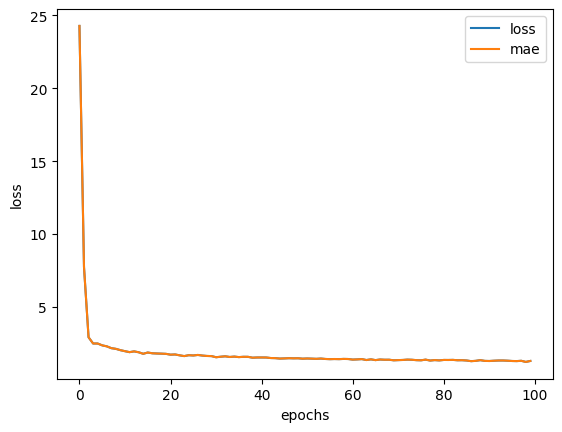

In [ ]:
model_dataset_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # meer lagen voor complexe berekening
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_dataset_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(), # het model leert stapgewijs door SGD
                        metrics=["mae"]
                        )

history_2 = model_dataset_2.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_dataset_2.evaluate(X_test_normalized, y_test))

in deze model wordt getraind met adam ipv SGD vanwege dat het beter optimized is. de learning rate bepaalt hoe snel het model leert

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0809 - mae: 0.0809
[0.08061893284320831, 0.08061893284320831]


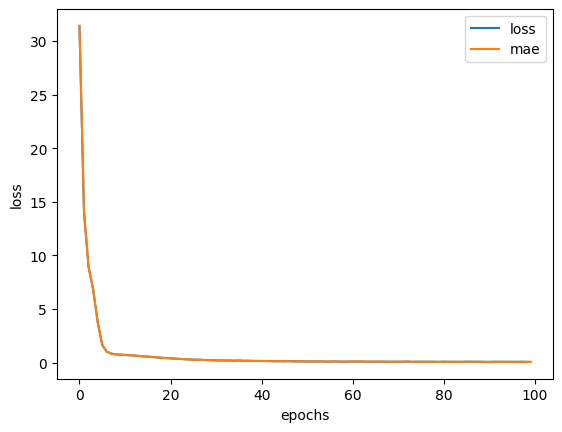

In [ ]:
model_dataset_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_dataset_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics=["mae"]
                        )

history_3 = model_dataset_3.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_dataset_3.evaluate(X_test_normalized, y_test))

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0471 - mae: 0.0471
[0.04558669775724411, 0.04558669775724411]


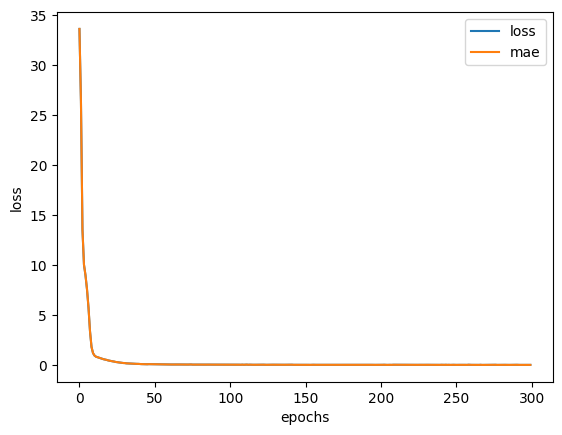

In [ ]:
model_dataset_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_dataset_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                        metrics=["mae"]
                        )

history_4 = model_dataset_4.fit(X_train_normalized,y_train,epochs = 300,verbose=0) # de data gaat 300 keer loopen, verbose 0 voor geen spam in de output
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_dataset_4.evaluate(X_test_normalized, y_test))

# weergeef de testing data & predictions

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


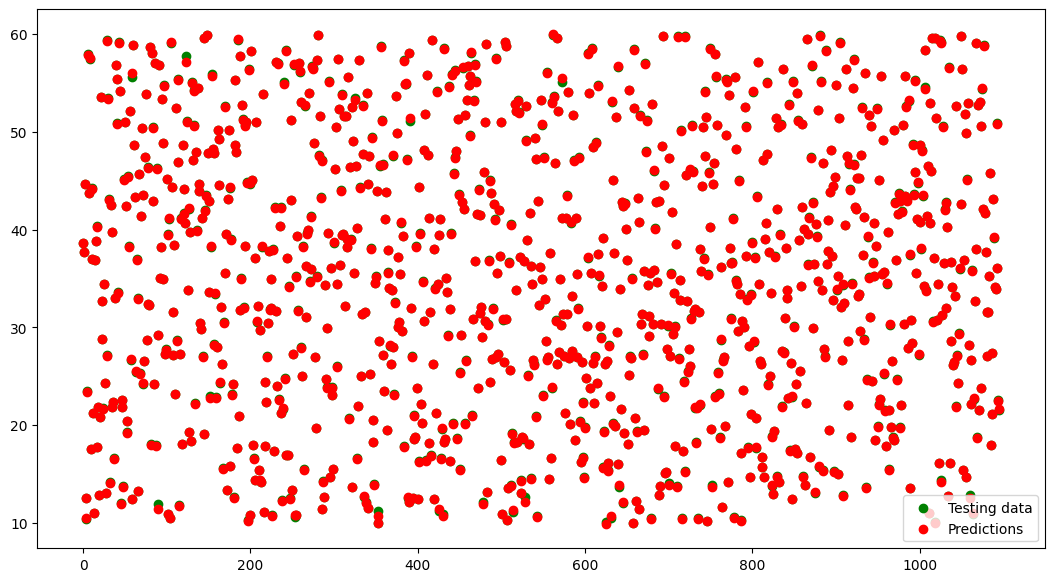

MAE: 0.04558671986099573
MSE: 0.004490329406282631
R2: 0.9999768557410922
None


In [ ]:
def plot_predictions(test_X, test_Y, pred_Y):
  plt.figure(figsize=(13, 7))
  plt.scatter(test_X, test_Y, c="g", label="Testing data")
  plt.scatter(test_X, pred_Y, c="r", label="Predictions")
  plt.legend()
  plt.show()

def model_report(y_test, y_pred):
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")

y_predict = model_dataset_4.predict(X_test_normalized)
plot_predictions(tf.range(0, len(y_test)),y_test,tf.squeeze(y_predict))
print(model_report(y_test,y_predict))

# Validatie check voor overfitting

In [ ]:
history = model_dataset_4.fit(
    X_train_normalized,
    y_train,
    epochs=100,
    validation_split=0.2,  # 20% van train data voor validatie
    verbose=0
)

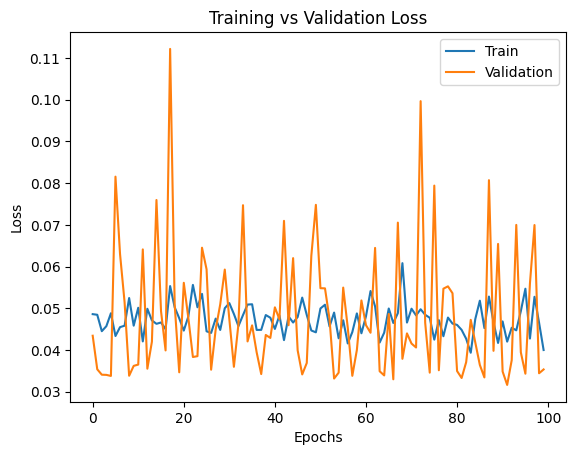

In [ ]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()